# <h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импоритруем необходимые библиотеки:
<a id ='import'></a>

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier






Сохраним датасет в переменную `data` при помощи метода `read_csv` и выведем первые пять строк таблицы:

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Таблица содержит следующие колонки:
* `RowNumber` — индекс строки в данных. Количественный тип данных
* `CustomerId` — уникальный идентификатор клиента. Количественный тип данных
* `Surname` — фамилия. Качественный тип данных
* `CreditScore` — кредитный рейтинг. Количественный тип данных 
* `Geography` — страна проживания. Качественный тип данных
* `Gender` — пол. Качественный тип данных
* `Age` — возраст. Количественный тип данных
* `Tenure` — сколько лет человек является клиентом банка. Количественный тип данных
* `Balance` — баланс на счёте. Количественный тип данных
* `NumOfProducts` — количество продуктов банка, используемых клиентом. Количественный тип данных
* `HasCrCard` — наличие кредитной карты. Количественный (дискретный) тип данных.
* `IsActiveMember` — активность клиента. Количественный (дискретный) тип данных.
* `EstimatedSalary` — предполагаемая зарплата. Количественный тип данных.
* `Exited` — факт ухода клиента. Количественный (дискретный) тип данных.

Вызовем метод `info`, чтобы подробнее изучить данные:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Всего в таблице 10000 записей, при этом типы переменных в колонках соответствуют данным.

Удалим из таблицы столбец `RowNumber`, отражающий индекс строки в данных, так как он не содержит никакой полезной информации, при этом лишняя информация может негативно повлиять на адекватность и результативность модели.

Также на время подготовки данных к построению модели мы можем исключить из таблицы столбцы `CustomerId`, `Surname`, так как ни уникальный идентификатор клиента, ни фамилия не влияют на отношения банка и клиентов.

In [4]:
data = data.drop(columns={'RowNumber','CustomerId', 'Surname'} , axis=1 )

Теперь изучим данные в таблице, поэтому вызовем метод `describe`:

In [5]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Как видим, таблица содержит пропущенные значения. Они находятся только в столбце 'Tenure', содержащем информацию о количестве лет, в течение которых человек является клиентом банка. 
Попробуем заполнить пропуски исходя из возраста и пола клиентов.

Для этого мы напишем функцию `fill_tenure`, которая будет принимать строку, а возвращать значение для столбца `'Tenure'`. Для ее написания используем библиотеку `math`, которую мы импортировали [ранее](#import):

In [6]:
def fill_tenure(row):
    age = row.loc['Age']
    gender = row.loc['Gender']
    tenure = row.loc['Tenure']
    if math.isnan(tenure):
        tenure = data.loc[(data['Age']==age) & (data['Gender']==gender)]['Tenure'].median()
    return tenure
    

Заполним пропуски в столбце `'Tenure'`, применив к таблице data функцию `fill_tenure`: 

In [7]:
data['Tenure'] = data.apply(fill_tenure, axis=1)

Проверим, остались ли пропуски после заполнения таблицы:

In [8]:
data[(data['Tenure'].isna())]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


Как видим, все пропуски заполнены.

В таблице практически все столбцы, кроме `Gender` и `Geography` - количественные. Нам нужно построить модель, которая будет решать задачу классификации (уйдет клиент или нет). Применим технику прямого кодирования, чтобы преобразовать категориальные переменные в количественные.

Для каждого замененного категориального столбца в таблице появятся новые количественные столбцы. Поскольку они сильно связаны между собой, и чтобы не попасть в дамми-ловушку, укажем аргумент drop_first=True

In [9]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [10]:
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Рассмотрим более подробно таблицу. Для этого вызовем метод `describe`:

In [11]:
data_ohe.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.996150,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.765732,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


В данных есть столбцы: Age и Balance. В таблице указан возраст от 18 до 92 лет, а баланс на счёте — от 0  до 250898.09. Значения и их разбросы в столбце Balance больше, поэтому алгоритм может решить, что этот признак важнее возраста. А это не так: все признаки значимы. Чтобы избежать этой ловушки, нужно масштабировать признаки. Для этого используем метод стандартизации данных.

[Ранее](#import) мы импортировали StandardScaler из библиотеки `sklearn.preprocessing`. Создадим объект этой структуры данных:

In [12]:
scaler = StandardScaler()

Чтобы настроить его, нам нужно разделить наши данные из таблицы data_ohe на обучающую, валидационную и тестовую выборки. 
Разделим исходные данные на обучающую, валидационную и тестовую выборки. Так как спрятанной тестовой выборки нет, то данные нужно разбить на три части. Размеры тестового и валидационного наборов обычно равны. Поэтому исходные данные разобъем в соотношении 3:1:1.

Для разделения на требуемые выборки мы ранее импортировали `train_test_split` из библиотеки `sklearn.model_selection`. C помощью функции train_test_split разделим исходный датасет:

In [13]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
features_train, features_2, target_train, target_2 = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_2, target_2, test_size=0.5, random_state=12345)

Проверим, как произошло разделение данных. Для этого проверим, каков размер получившихся выборок:

In [14]:
print(features_train.shape[0])
print(features_valid.shape[0])
print(features_test.shape[0])

print(target_train.shape[0])
print(target_valid.shape[0])
print(target_test.shape[0])

6000
2000
2000
6000
2000
2000


Преобразуем обучающие, валидационные и тестовые выборки функцией `transform()`:

In [15]:
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

### Вывод

В этой части проекта мы:
* удалили столбцы с избыточной для построения и обучения модели информацией ('RowNumber', 'CustomerId',  'Surname') 
* заполнили пропуски в столбце 'Tenure' 
* перевели столбцы с категориальными переменными в количественные ('Gender' и 'Geography') 
* разделили данные на обучающую, валидационную и тестовую выборки
* произвели масштабирование признаков с помощью метода стандартизации данных.

## Исследование задачи

Посмотрим, как соотносятся значения целевого признака друг к другу. Для этого вызовем метод `value_counts` для обучающей выборки. Чтобы сразу увидеть соотношение величин, в параметрах укажем `normalize=True` :

In [16]:
target_train.value_counts(normalize=True)

0    0.800667
1    0.199333
Name: Exited, dtype: float64

Как видим, классы несбалансированны, их соотношение примерно 4:1, а не 1:1. Баланс же классов наблюдается, если их количество примерно равно. Поэтому для определения точности модели метрика accuracy не подходит. Вместо будем использовать F1-меру. Также для сравнения будем сразу же подсчитывать метрику AUC-ROC.

Сначала обучим модель логистической регрессии. Для ее создания [ранее](#import) мы импортировали  соответствующий модуль из библиотеки `sklearn.linear_model`.

Обучим модель на обучающей выборке, и посчитаем значение F1-меры, AUC-ROC на данных валидационной выборки:

In [17]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
valid_f1_score = f1_score(target_valid, predictions)
print("Значение F1-меры:", valid_f1_score)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение метрики AUC-ROC:', auc_roc)


Значение F1-меры: 0.33670033670033667
Значение метрики AUC-ROC: 0.7585455997193304


In [19]:
col = ['n_estimators', 'f1_score', 'auc_roc']
data = []

for est in range(1, 100):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train,target_train) 
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    data.append([est, f1, auc_roc])
table = pd.DataFrame(data = data, columns=col)
display(table[table['f1_score']==table['f1_score'].max()]) 
display(table[table['auc_roc']==table['auc_roc'].max()])

,n_estimators,f1_score,auc_roc
60,61,0.585652,0.838944


,n_estimators,f1_score,auc_roc
90,91,0.576119,0.840941


Наибольшее значение F1-меры в 0.585652 достигается при величине гиперпараметра n_estimators равного 61. Максимальное значение метрики AUC-ROC (0.84) достигается при n_estimators=91.

### Вывод

В этой части работы мы обнаружили, классы несбалансированны, их соотношение примерно 4:1. Также мы изучили модели для решения задачи классификации и подсчитали для каждой из них значение F1-меры и AUC-ROC, меняя (где есть возможность) значение гиперпараметров. 
* модель логистической регрессии: F1-меры: 0.337, AUC-ROC: 0.759
* модель решающего дерева: максимальная F1-мера 0.569 при max_depth=6 (AUC-ROC = 0.816), максимальная величина AUC-ROC 0.822 при max_depth=5 (F1-мера = 0.54)
* модель случайного леса : максимальная F1-мера в 0.586 при n_estimators=61 (AUC-ROC =0.839). Максимальное значение метрики AUC-ROC 0.84 при n_estimators=91 (F1-мера  = 0.576).


## Борьба с дисбалансом

**Взвешивание классов**

Один из способов борьбы с дисбалансом классов - взвешивание классов. Если указать `class_weight='balanced'`, алгоритм посчитает, во сколько раз один класс встречается чаще другого класса. Аргумент class_weight есть всех трех, используемых нами, типов моделей: логистической регрессии, решающего дерева и случайного леса.
Посмотрим, как изменятся результаты, если мы укажем `class_weight='balanced'`:

In [20]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
valid_f1_score = f1_score(target_valid, predictions)
print("Значение F1-меры:", valid_f1_score)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение метрики AUC-ROC:', auc_roc)

Значение F1-меры: 0.48843187660668386
Значение метрики AUC-ROC: 0.7635404883891144


Как видим значение F1-меры  увеличилилось и стало 0.488 (было 0.337), значение метрики AUC-ROC также увеличилось и стало 0.764 (было 0.759).

Теперь укажем class_weight='balanced' для модели решающего дерева:

In [21]:
col = ['max_depth', 'f1_score', 'auc_roc']
data = []

for depth in range(1, 16):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train,target_train) 
    predictions = model.predict(features_valid)
    valid_f1_score = f1_score(target_valid, predictions)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    data.append([depth, valid_f1_score, auc_roc])
table = pd.DataFrame(data = data, columns=col)
display(table[table['f1_score']==table['f1_score'].max()]) 
display(table[table['auc_roc']==table['auc_roc'].max()])

,max_depth,f1_score,auc_roc
4,5,0.596379,0.831024


,max_depth,f1_score,auc_roc
4,5,0.596379,0.831024


Как видим, теперь и максимальное значение F1-меры и значение метрики AUC-ROC достигаются при значении параметра max_depth = 5. Помимо этого, оба показателя выросли и достигли:
* F1-мера: 0.596 (ранее - 0.569)
* AUC-ROC: 0.831 (ранее - 0.822)

Теперь укажем class_weight='balanced' для модели случайного леса:

In [22]:
col = ['n_estimators', 'f1_score', 'auc_roc']
data = []

for est in range(1, 100):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced') 
    model.fit(features_train,target_train) 
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    data.append([est, f1, auc_roc])
table = pd.DataFrame(data = data, columns=col)
display(table[table['f1_score']==table['f1_score'].max()]) 
display(table[table['auc_roc']==table['auc_roc'].max()])

,n_estimators,f1_score,auc_roc
8,9,0.590585,0.806188


,n_estimators,f1_score,auc_roc
83,84,0.573171,0.838054


Как видим, взвешивание классов совершенно изменило результаты. Теперь лучши показатели метрик достигаются при совершенно других величинах параметра n_estimators(количество деревьев в лесу):
* максимальное значение F1-меры: 0.59, при n_estimators = 8 (AUC-ROC=0.806)
* максимальное значение метрики AUC-ROC: 0.838, при  n_estimators = 84(F1-мера = 0.573)

**Изменение порога классификации**

Далее рассмотрим такой вид борьбы с дисбалансом, как изменение порога классификации. 
Посмотрим, как меняются показатели  F1-меры и метрики AUC-ROC с изменением значения порога от 0 до 1 для модели логистической регрессии:

In [23]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

col = ['порог', 'f1_score', 'auc_roc']
data = []
for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    valid_f1_score = f1_score(target_valid, predicted_valid )
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    data.append([threshold, valid_f1_score, auc_roc])
table = pd.DataFrame(data = data, columns=col)
display(table[table['f1_score']==table['f1_score'].max()]) 
display(table[table['auc_roc']==table['auc_roc'].max()].head())

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,порог,f1_score,auc_roc
13,0.26,0.502033,0.758546


,порог,f1_score,auc_roc
0,0.00,0.345740,0.758546
1,0.02,0.348479,0.758546
2,0.04,0.368491,0.758546
3,0.06,0.390315,0.758546
4,0.08,0.403536,0.758546


Максимально значение F1-меры в 0.502 достишается при порог = 0.26. Метрика AUC-ROC равна 0.758.

Теперь проделаем то же самое с моделью решающего дерева. Из предыдущего пункта мы выяснили, что лучшие показатели показывает модель, у которой глубина равна 5. Аналогично модели логистической регрессии, выведем максимальные значения показателей f1_score, auc_roc, меняя величину порога:

In [24]:
model =  DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

col = ['порог', 'f1_score', 'auc_roc']
data = []
for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    valid_f1_score = f1_score(target_valid, predicted_valid )
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    data.append([threshold, valid_f1_score, auc_roc])
table = pd.DataFrame(data = data, columns=col)
display(table[table['f1_score']==table['f1_score'].max()]) 
display(table[table['auc_roc']==table['auc_roc'].max()].head())

,порог,f1_score,auc_roc
29,0.58,0.6082,0.831024
30,0.60,0.6082,0.831024
31,0.62,0.6082,0.831024
32,0.64,0.6082,0.831024
33,0.66,0.6082,0.831024


,порог,f1_score,auc_roc
0,0.00,0.344513,0.831024
1,0.02,0.344513,0.831024
2,0.04,0.382959,0.831024
3,0.06,0.382959,0.831024
4,0.08,0.382959,0.831024


Как видим, максимальное значение F1-меры (0.6082) достигается при нескольких величинах порога. Примем за оптимальную наиболее близкую к величине по умолчанию (0.5) - 0.58.
Значение метрики AUC-ROC при этом также максимальное и составляет 0.831.

Теперь узнаем, как изменятся результаты, если поменять значение порога на модели случайного леса. Единственная модель, у которой F1-мера отвечала требованиям поставленной задачи, была модель с значением n_estimators = 9 (f1_score = 0.59, auc_roc = 0.806). Используем это значение гиперпараметра дальше:

In [25]:
model = RandomForestClassifier(random_state=12345, n_estimators=9, class_weight='balanced') 
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

col = ['порог', 'f1_score', 'auc_roc']
data = []
for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    valid_f1_score = f1_score(target_valid, predicted_valid )
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    data.append([threshold, valid_f1_score, auc_roc])
table = pd.DataFrame(data = data, columns=col)
display(table[table['f1_score']==table['f1_score'].max()]) 
display(table[table['auc_roc']==table['auc_roc'].max()].head())

,порог,f1_score,auc_roc
23,0.46,0.590585,0.806188
24,0.48,0.590585,0.806188
25,0.50,0.590585,0.806188
26,0.52,0.590585,0.806188
27,0.54,0.590585,0.806188


,порог,f1_score,auc_roc
0,0.00,0.444851,0.806188
1,0.02,0.444851,0.806188
2,0.04,0.444851,0.806188
3,0.06,0.444851,0.806188
4,0.08,0.444851,0.806188


Как видим, максимальное показатели достигается при нескольких величинах порога. При этом, они на таком же уровне, как и при методе взвешивания классов (без указания  class_weight='balanced' при создании модели максимальная величина наших метрик  при изменении порога меньше, чем 0.590 и 0.806).


### Вывод

В этой части работы мы применили несколько методов борьбы с дисбалансом классов. Метод взвешивания классов дал следующие результаты:

* логистическая регрессия: F1-мера = 0.488, AUC-ROC = 0.763
* решающее дерево: F1-мера = 0.596 AUC-ROC = 0.831, при  max_depth = 5
* случайный лес: максимальная F1-мера: 0.59, при n_estimators = 8 (AUC-ROC=0.806), максимальная метрика AUC-ROC = 0.838, при n_estimators = 84(F1-мера = 0.573)

Метод изменения порога классификации дал следующие результаты:

* логистическая регрессия: максимальная F1-мера = 0.502, AUC-ROC = 0.758  при пороге = 0.26
* решающее дерево: F1-мера = 0.6082, AUC-ROC = 0.831 при пороге 0.58 
* случайный лес: при изменении порога показатели не улучшились и остались на уровне метода взвешивания классов.

Наилучший результат показала модель решающего дерева, при значении гиперпараметра max_depth = 5, указании атрибута class_weight='balanced' и изменении порога, равным 0.58.

## Тестирование модели

Протестируем нашу модель на тестовой выборке:

Валидационная выборка:
F1-мера: 0.6082004555808656
AUC-ROC: 0.8310244134068074
Тестовая выборка:
F1-мера: 0.6004464285714286
AUC-ROC: 0.8355347481752318


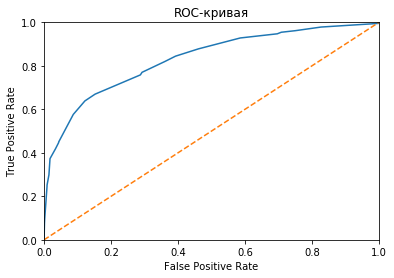

In [26]:
model =  DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

threshold = 0.58
predicted_valid = probabilities_one_valid > threshold
valid_f1_score = f1_score(target_valid, predicted_valid )
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Валидационная выборка:')
print('F1-мера:', valid_f1_score)
print('AUC-ROC:',auc_roc)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > threshold
test_f1_score = f1_score(target_test, predicted_test )
auc_roc_test = roc_auc_score(target_test, probabilities_one_test)
print('Тестовая выборка:')
print('F1-мера:',test_f1_score)
print('AUC-ROC:',auc_roc_test)


fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Теперь проверим на адекватность, выбранную нами модель. Для этого посмотрим, как справится с задачей фиктивный классификатор DummyClassifier (импортировали [ранее](#import)). Он покажет вероятность успеха, даже если просто "угадать". Таким образом, чтобы признать модель адекватной, нужно, чтобы показатели метрик были выше, чем те, которые получатся у фиктивного классификатора. 
Так как от значения параметра `strategy` может поменяться результат, переберем их, и для сравнения будем учитывать лучший результат: 

In [27]:
names = ['stratified', 'most_frequent', 'prior', 'uniform']
data = []
col = ['name', 'f1_score_valid', 'auc_roc_valid', 'f1_score_test', 'auc_roc_test']
for name in names:
    new_dummy_classifier = DummyClassifier(strategy=name)
    new_dummy_classifier.fit(features_train, target_train)

    predictions_valid = new_dummy_classifier.predict(features_valid)
    valid_accuracy = accuracy_score(target_valid, predictions)
    valid_f1_score = f1_score(target_valid, predictions_valid )
    auc_roc_valid = roc_auc_score(target_valid, predictions_valid)
    test_predictions = new_dummy_classifier.predict(features_test)
    test_accuracy = accuracy_score(target_test, test_predictions)
    test_f1_score = f1_score(target_test, test_predictions )
    auc_roc_test = roc_auc_score(target_test, test_predictions)
    data.append([name, valid_f1_score, auc_roc_valid, test_f1_score, auc_roc_test])
table = pd.DataFrame(data = data, columns=col)
display(table[table['f1_score_test']==table['f1_score_test'].max()]) 
display(table[table['f1_score_valid']==table['f1_score_valid'].max()].head())



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,name,f1_score_valid,auc_roc_valid,f1_score_test,auc_roc_test
3,uniform,0.29073,0.495079,0.300142,0.50464


,name,f1_score_valid,auc_roc_valid,f1_score_test,auc_roc_test
3,uniform,0.29073,0.495079,0.300142,0.50464


Как видим, показатели у лучшего (при значении параметра `strategy='uniform' `) из фиктивных классификаторов намного ниже, чем у нашей модели, и находятся на уровне 0.29 для F1-меры, а также 0.517 - для метрики AUC-ROC.

### Вывод

В качестве лучшей модели была выбрана модель решающего дерева при значении гиперпараметра max_depth = 5, указании атрибута class_weight='balanced' и изменении порога, равным 0.58.

На валидационной выборке модель следующие результаты:
* F1-мера: 0.608
* AUC-ROC: 0.831

На тестовой выборке модель следующие результаты:
* F1-мера: 0.60 (уменьшилась на 0.008)
* AUC-ROC: 0.836 (увеличилась на 0.005)

Проверку на адекватность модель выдержала. Лучшие (F1-мера:0.29, AUC-ROC: 0.517) показатели фиктивного классификатора значительно ниже.

Требование касательно значения F1-меры (нужно довести метрику до 0.59) выполнено - **значение F1-меры нашей модели равно 0.6 на тестовой выборке.**

